Run 10/100
Run 20/100
Run 30/100
Run 40/100
Run 50/100
Run 60/100
Run 70/100
Run 80/100
Run 90/100
Run 100/100


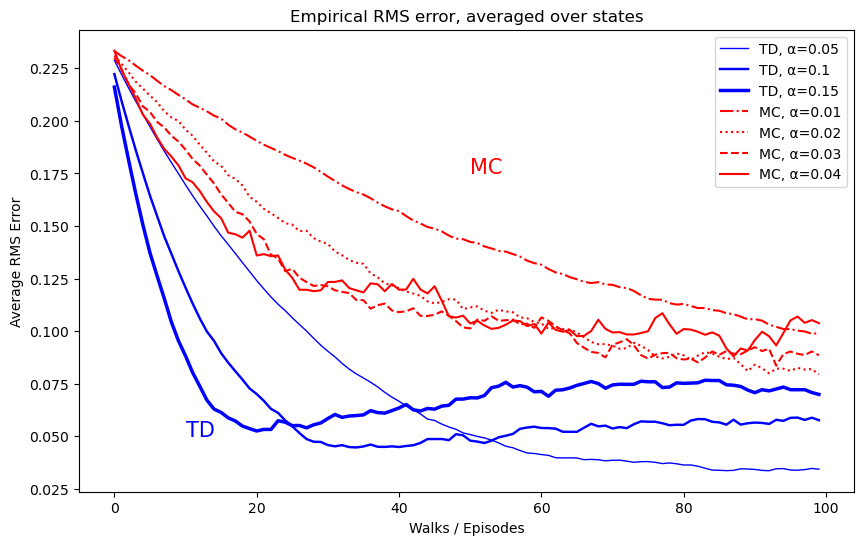

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# true value for each state
true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])

# initialize params
num_runs = 100      # number of runs
num_episodes = 100  # number of episode in each run
alphas_td = [0.05, 0.1, 0.15]  # alphas for TD
alphas_mc = [0.01, 0.02, 0.03, 0.04]   # alphas for MC

# initialize array to store rms
rms_td = np.zeros((len(alphas_td), num_episodes))
rms_mc = np.zeros((len(alphas_mc), num_episodes))


def generate_episode():
    """generate the track for one episode"""

    # the state A, B, C, D, E have state index: 0, 1, 2, 3, 4 respectively
    current_state = 2  # initial state is C with index 2
    rewards = []  # initialize reward sequence
    states = [current_state]  # initialize state sequence

    # stop only if the state exceeds 0 or 4
    while True:
        # choose left or right: move state -1 or 1
        action = np.random.choice([-1, 1])
        next_state = current_state + action

        if next_state < 0:   # terminate on the left side
            rewards.append(0)
            break
        elif next_state >= 5:  # terminate on the right side
            rewards.append(1)
            break
        else:                # continue for the next move
            rewards.append(0)
            current_state = next_state
            states.append(current_state)

    return states, rewards


# experiment run
for run in range(num_runs):
    # check process
    if (run+1) % 10 == 0:
        print(f"Run {run+1}/{num_runs}")

    # experiment for TD alphas
    for i, alpha in enumerate(alphas_td):
        V = np.full(5, 0.5)  # initialize value functions
        errors = []  # initialize error for each episode

        for _ in range(num_episodes):
            states, rewards = generate_episode()

            # TD(0)update
            for t in range(len(rewards)):
                s_t = states[t]
                r_t = rewards[t]

                # calculate TD target (no gamma in this setting)
                if t + 1 < len(states):
                    target = r_t + V[states[t+1]]
                else:
                    target = r_t  # the return at the end of episode

                # value update
                V[s_t] += alpha * (target - V[s_t])

            # record rms error for this episode
            errors.append(np.sqrt(np.mean((V - true_values)**2)))

        # add the error value to the error matrix
        rms_td[i] += errors

    # experiment for MC alphas
    for i, alpha in enumerate(alphas_mc):
        V = np.full(5, 0.5)  # initialize value functions
        errors = []  # initialize error for each episode

        for _ in range(num_episodes):
            states, rewards = generate_episode()
            # in this setting the final reward is the whole reward
            G = rewards[-1]

            # MC update
            for s in states:
                V[s] += alpha * (G - V[s])

            # record rms error for this episode
            errors.append(np.sqrt(np.mean((V - true_values)**2)))

        rms_mc[i] += errors

# calculate mean rms for 100 runs
rms_td /= num_runs
rms_mc /= num_runs

# make the plot
plt.figure(figsize=(10, 6))
plt.title("Empirical RMS error, averaged over states")
plt.xlabel("Walks / Episodes")
plt.ylabel("Average RMS Error")

# draw curve for TD
linewidths = [1, 1.75, 2.5]
for i, alpha in enumerate(alphas_td):
    plt.plot(rms_td[i], color='blue', linewidth=linewidths[i],
             linestyle='-', label=f'TD, α={alpha}')

# draw curve for MC
linestyles = ['dashdot', 'dotted', 'dashed', 'solid']
for i, alpha in enumerate(alphas_mc):
    plt.plot(rms_mc[i], color='red',
             linestyle=linestyles[i], label=f'MC, α={alpha}')

plt.text(50, 0.175, "MC", color='red', fontsize=15)
plt.text(10, 0.05, "TD", color='blue', fontsize=15)
plt.legend()
plt.show()

The original figure:
![](img/6.2.png)